In [1]:
class Maze(object):
    """Simulador de laberinto"""
    def __init__(self,board):
        #Define el laberinto 
        self.board = [list(x) for x in board.split("\n") if x]
        #Guarda el estado inicial 
        self.goal = None

        for y in range(len(self.board)):
            for x in range(len(self.board[y])):
                if self.board[y][x] == 'o':
                    #El inicial es el estado con el simbolo 'o' 
                    self.initial = (x,y)
                elif self.board[y][x] == 'x':
                    #La meta es el estado con el simbolo 'x'
                    self.goal = (x,y)

    def __str__(self):
        return '\n'.join([''.join(symbols) for symbols in self.board])

    def actions(self, state):
        """Define las posibles acciones permitidas en cada estado"""
        actions = []
        for action in ["up","down","left","right"]:
            newx, newy = self.result(state,action)
            #Una acción no permitida es aquella donde se 
            #topa con un simbolo # que indica pared
            if self.board[newy][newx] != "#":
                actions.append(action)
        return actions

    def result(self,state, action):
        """Calcula el estado resultante de la acción"""
        #Determina el estado actual 
        x,y = state
        #Genera el resultado de las acciones
        if action.count("up"):
            y -= 1
        if action.count("down"):
            y += 1
        if action.count("left"):
            x -= 1
        if action.count("right"):
            x += 1
        new_state = (x,y)
        return new_state

    def move(self, state, new_state, symbol = 'o'):
        """Cambia la psición del agente de un estado a otro"""
        x,y = state
        new_x, new_y = new_state
        if self.board[new_y][new_x] == ' ':
            #Mueve al agente al mismo estado
            self.board[y][x] = ' '
            self.board[new_y][new_x] = symbol
        else:
            pass

    def draw(self):
        """Dibuja el mapa"""
        import matplotlib.pyplot as plt
        import numpy as np 
        #Crea la imagen 
        img = np.ones((len(self.board), len(self.board[0]),4)) #(x,y) x 4 -> 3D
        for i,row in enumerate(self.board):
            for j, element in enumerate(row):
                #Colorea al agente de azul, la meta de verde y los 
                #obstáculos de negro
                if element == '#':
                    img[i,j] = np.array([0,0,0,1])
                elif element == 'o':
                    img[i,j] = np.array([0.2,0.5,0.8,1])
                elif element == 'x':
                    img[i,j] = np.array([0.2,0.9,0.5,1])

        plt.imshow(img)
        plt.show()

    def is_goal(self, state):
        """Determina si un estado es meta"""
        return state == self.goal



In [2]:
mapa = """
##############################
# o         #              # #
######  #   ##########  #  # #
#       #   ##          #    #
#  #           #   #####     x
##############################
"""    

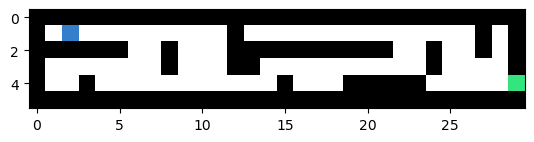

Coordenadas inicial: (2, 1)
Coordenadas meta:(29, 4)


In [3]:
maze = Maze(mapa)
maze.draw()
print(f"Coordenadas inicial: {maze.initial}\nCoordenadas meta:{maze.goal}") 

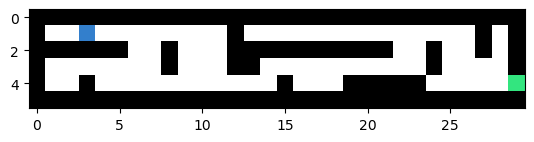

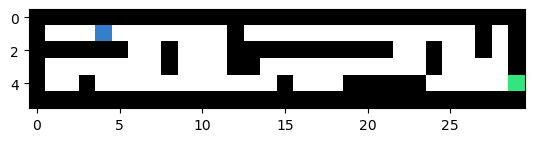

In [4]:
new_state = maze.result(maze.initial, "right")
maze.move(maze.initial, new_state)
maze.draw()
maze.move(new_state, maze.result(new_state,"right"))
maze.draw()